# this shows some examples to load and plot the paired sessions data

In [18]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d



In [19]:
LoadDatafile = "/Users/Erfan/Desktop/Representational Drift/Ca1 Xin Data /WeekLearningData.npz"

with np.load(LoadDatafile,allow_pickle=True) as data:
    AllSerialdffData = data['AlltaskdffSerial'][()]
    AllVRonPeriodData = data['VRonPeriodData'][()]
    AllContextWiseBehav = data['AllContextWiseBehav'][()]
    AllPairTVDatas = data['AllPairTVDatas'][()]
    PairedSessDays = data['PairedSessDays'][()]
    SponLastSess_serialDff = data['SponSessDffTrace'][()]
    SponBehavSerials = data['SponBehavSerial'][()]

# LoadDatafile2 = "/Users/Erfan/Desktop/Representational Drift/Ca1 Xin Data /WeekLearningData_ROIloc.npz"
# with np.load(LoadDatafile2,allow_pickle=True) as data2:
#     AllPairROIcenter = data2['AllSessROIcents'][()] # this contains the center loc for all ROIs, each 
#     AllPairROIpixels = data2['AllSessROIPixels'][()]


Current session is Day 1


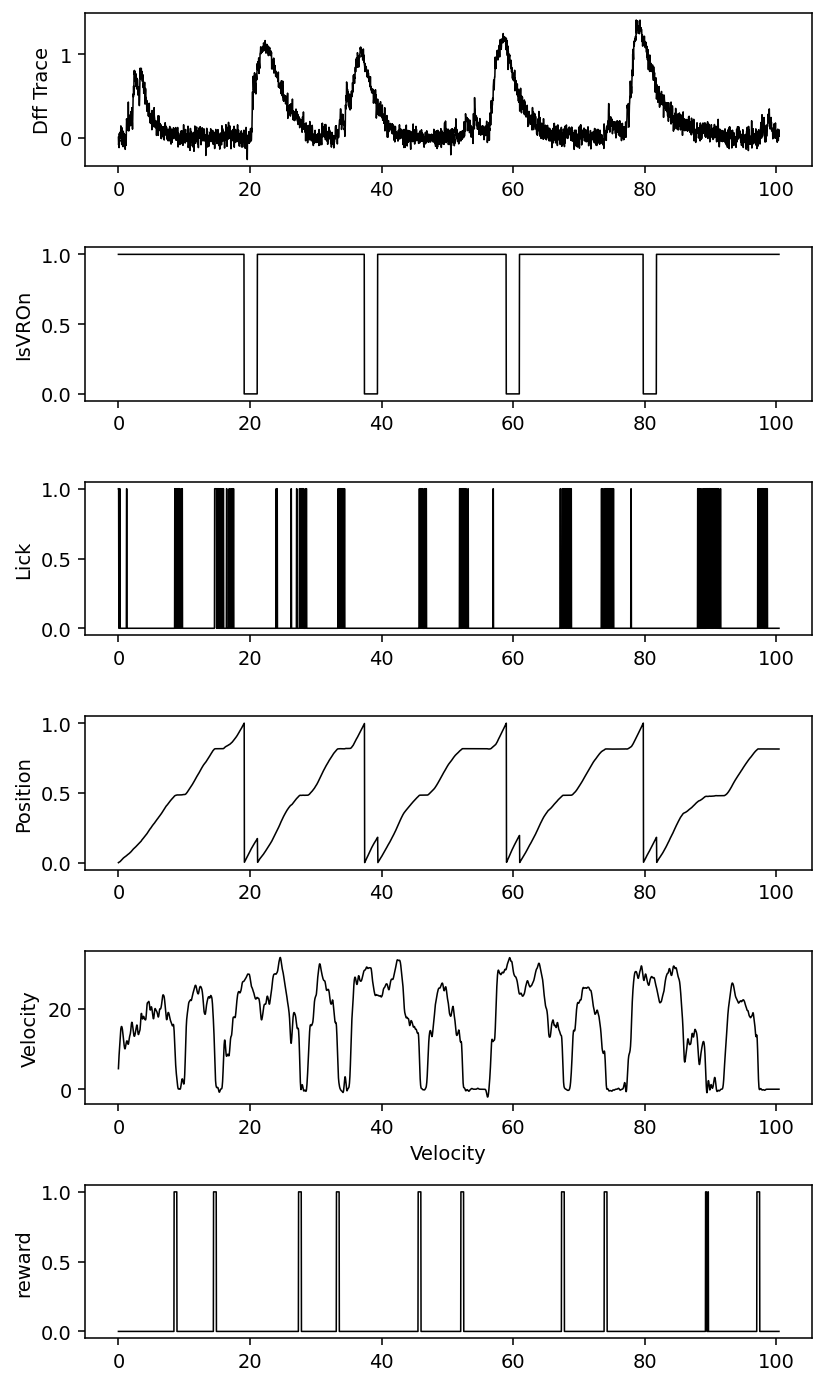

In [ ]:
fr = 29.8739

CheckSessIndex = 0
SessDayStr = PairedSessDays[CheckSessIndex]
print(f"Current session is Day {SessDayStr}")
cSessData = AllSerialdffData[CheckSessIndex]

PlotRange=3000 # only plot the first 3000 frametime events
Frametimes = np.arange(0,PlotRange)/fr
cDataStr = ["Dff Trace","IsVROn","Lick","Position","Velocity","reward"]
fig330, ax030 = plt.subplots(nrows=len(cDataStr), ncols=1, figsize=(6,10),dpi=140)
for cInds in range(6):
    cData = cSessData[cInds]
    if cData.ndim > 1:
        ax030[cInds].plot(Frametimes,cData[0,0:PlotRange],'k',lw=0.8) # plot the first ROI as example
    else:
        ax030[cInds].plot(Frametimes,cData[0:PlotRange],'k',lw=0.8)
    ax030[cInds].set_ylabel(cDataStr[cInds])
    if cInds == 4: # last plot add xlabel
        ax030[cInds].set_xlabel(cDataStr[cInds])

plt.tight_layout()

Current session is Spontaneous recording at Day 10


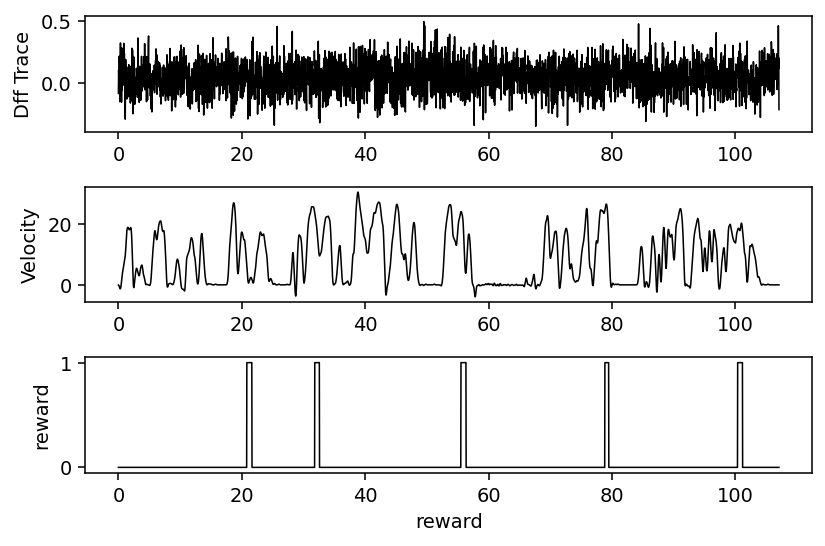

In [ ]:
# VR off Sponteneous conditions at day 10

fr = 29.8739

print(f"Current session is Spontaneous recording at Day 10")

PlotRange=3200 # only plot the first 3000 frametime events
Frametimes = np.arange(0,PlotRange)/fr
PlotDatas = [SponLastSess_serialDff,SponBehavSerials[0],SponBehavSerials[1]]
cDataStr = ["Dff Trace","Velocity","reward"]
Numofplots = len(PlotDatas)
fig3302, ax0302 = plt.subplots(nrows=Numofplots, ncols=1, figsize=(6,4),dpi=140)
for cInds in range(Numofplots):
    cData = PlotDatas[cInds]
    if cData.ndim > 1:
        ax0302[cInds].plot(Frametimes,cData[2,0:PlotRange],'k',lw=0.8) # plot the first ROI as example
    else:
        ax0302[cInds].plot(Frametimes,cData[0:PlotRange],'k',lw=0.8)
    ax0302[cInds].set_ylabel(cDataStr[cInds])
    if cInds == Numofplots-1: # last plot add xlabel
        ax0302[cInds].set_xlabel(cDataStr[cInds])

plt.tight_layout()

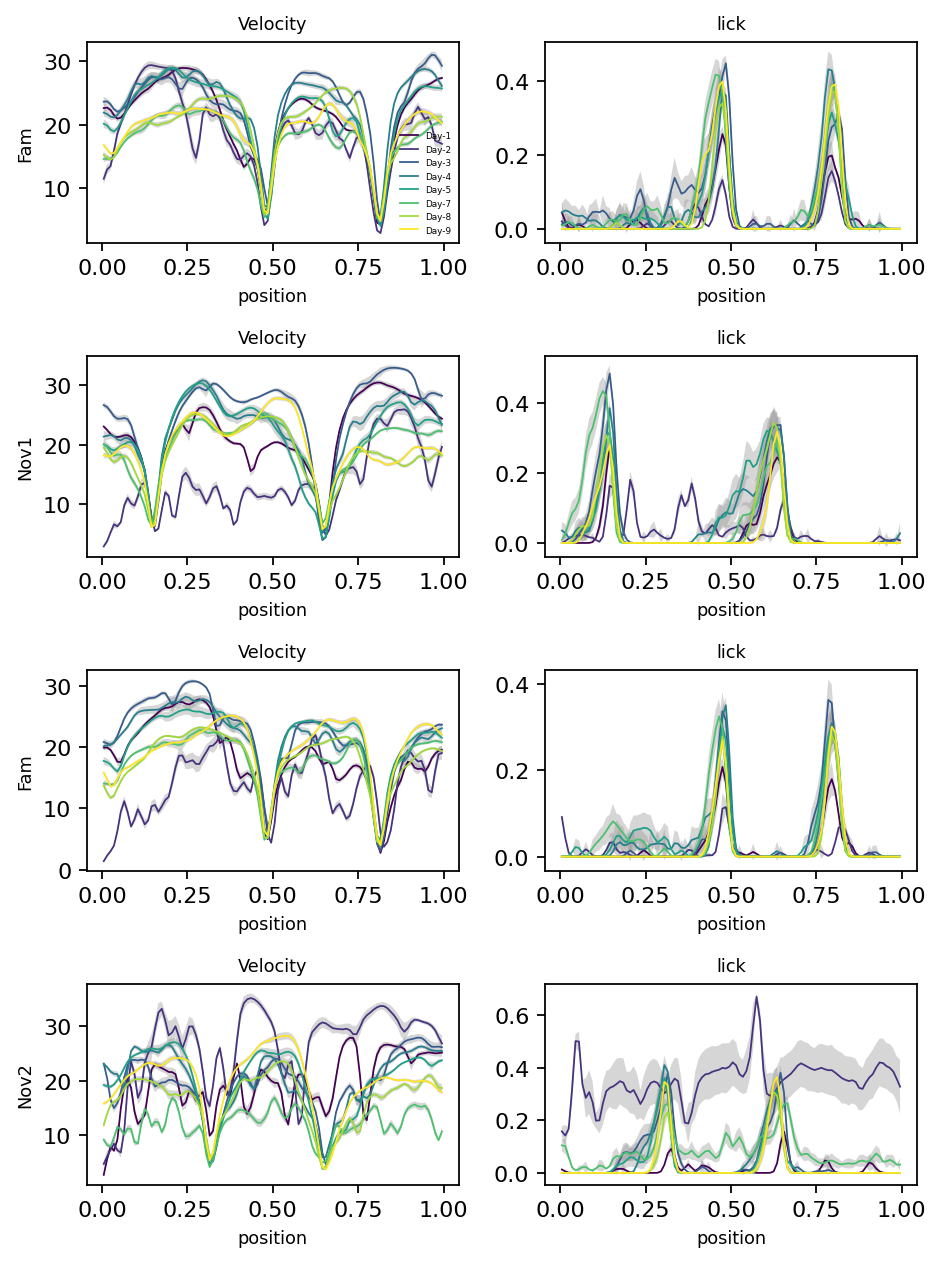

In [ ]:
# this is to show that there is no significant learning effect at least for the familiar context
nBins = 100
LocBins = np.linspace(0.0,1.0,nBins+1)

fig32, ax02 = plt.subplots(nrows=4, ncols=2, figsize=(6,8),dpi=160)

UsedInds = np.array([0,1,2,3,4,6,7,8],dtype='int')
cmap = plt.get_cmap('viridis')
laplineColors = cmap(np.linspace(0,1,len(UsedInds)))
spbincents = (LocBins[:-1]+LocBins[1:])/2

PlotData = 0 # 0 indicates Velocity, 1 indicates licks, 2 indicates reward
PlotDataStr = ['Velocity','lick']
cContext = 0 # only plot the first familiar context sections at here, you can change it to plot the other section, range from 0-3
ContextStrs = ['Fam','Nov1','Fam','Nov2']

k = 0
for cData in range(2):
    for cContext in range(4):
        cax = ax02[cContext,cData]
        for Inds,Days in enumerate(UsedInds):
            cSessData = AllContextWiseBehav[Inds][cContext][cData]
            SmoothedTrace = gaussian_filter1d(cSessData[0],1)
            cax.fill_between(spbincents,SmoothedTrace-cSessData[1],SmoothedTrace+cSessData[1],
                        alpha=0.4,ec='none',fc=[0.6,0.6,0.6])
            cax.plot(spbincents,SmoothedTrace,lw=0.8,color=laplineColors[Inds],label=f"Day-{Days+1}")
        if cData%2 == 0:
            cax.set_title(f"{PlotDataStr[cData]}",fontsize=8)
            cax.set_ylabel(f"{ContextStrs[cContext]}",fontsize=8)
            cax.set_xlabel("position",fontsize=8)
        else:
            cax.set_title(f"{PlotDataStr[cData]}",fontsize=8)
            cax.set_xlabel("position",fontsize=8)
        k += 1
ax02[0,0].legend(fontsize=4,loc='best',shadow=None,frameon=False)
plt.tight_layout()

Erfan test

In [ ]:
# Quick way to print number of neurons per day:
for sess_idx, sess_data in enumerate(AllSerialdffData):
    n_neurons = sess_data[0].shape[0]
    print(f"Session {sess_idx} (Day {PairedSessDays[sess_idx]}): {n_neurons} neurons")


Session 0 (Day 1): 305 neurons
Session 1 (Day 2): 305 neurons
Session 2 (Day 3): 305 neurons
Session 3 (Day 4): 305 neurons
Session 4 (Day 5): 305 neurons
Session 5 (Day 7): 305 neurons
Session 6 (Day 8): 305 neurons
Session 7 (Day 10): 305 neurons


Analyzing session: Day 1
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 2
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 3
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 4
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 5
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 7
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 8
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 10
Detected 305 place cells out of 305 neurons.


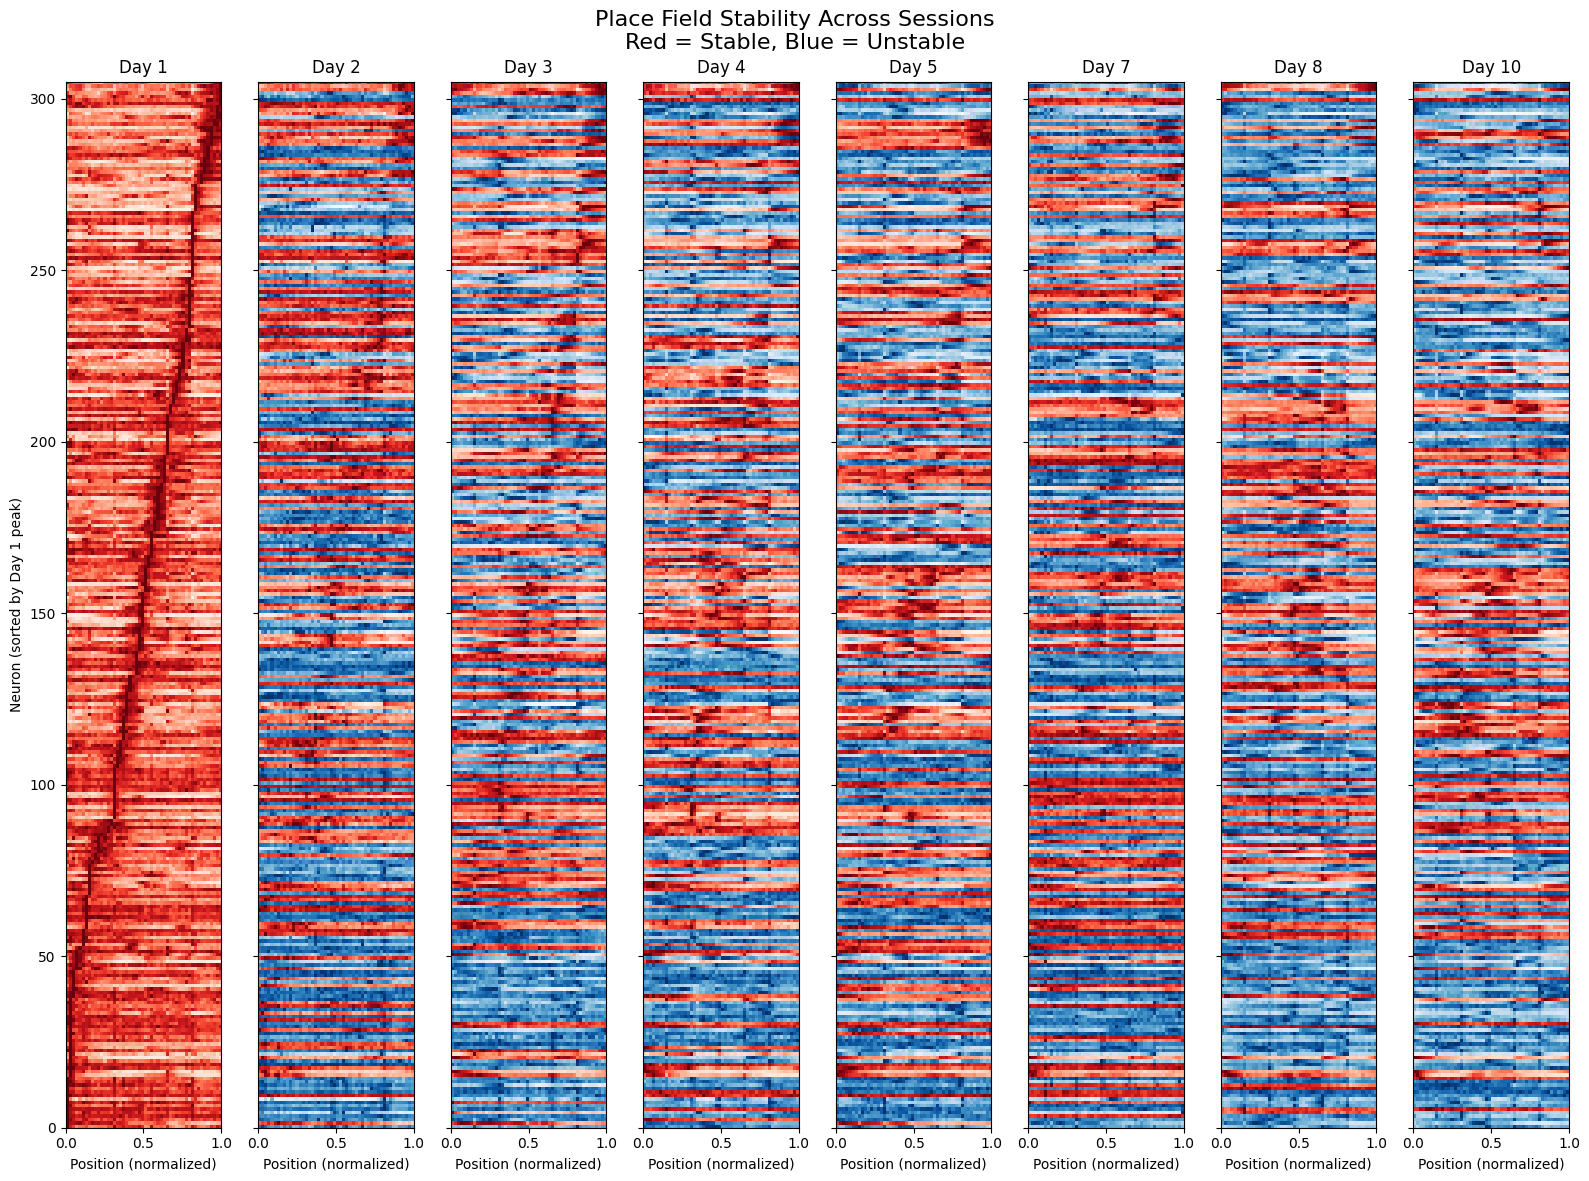

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fr = 29.8739  # frame rate
threshold = 0.2  # dF/F threshold for calcium event detection
n_bins = 50  # number of spatial bins
place_cell_selectivity_factor = 2.0  # threshold for place cell detection
peak_shift_thresh = 0.2  # max allowed peak shift (in normalized space)

# Storage for cross-session comparison
all_normalized_maps = []
all_peak_locations = []
all_place_cell_flags = []

# For all sessions
for session_idx in range(len(AllSerialdffData)):
    cSessData = AllSerialdffData[session_idx]
    SessDayStr = PairedSessDays[session_idx]
    print(f"Analyzing session: Day {SessDayStr}")

    # Extract signals
    dff_traces = cSessData[0]         # [n_neurons x timepoints]
    is_vr_on = cSessData[1]           # [timepoints]
    position = cSessData[3]           # [timepoints]

    # Only keep VR ON periods
    valid_mask = is_vr_on > 0
    dff_traces_valid = dff_traces[:, valid_mask]
    position_valid = position[valid_mask]

    # Detect "calcium events"
    events = (dff_traces_valid > threshold).astype(int)

    # Bin position
    position_bins = np.linspace(0, 1, n_bins + 1)
    bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

    n_neurons = dff_traces.shape[0]
    event_map = np.zeros((n_neurons, n_bins))
    occupancy = np.zeros(n_bins)

    # Compute occupancy
    for b in range(n_bins):
        bin_mask = (position_valid >= position_bins[b]) & (position_valid < position_bins[b+1])
        occupancy[b] = np.sum(bin_mask) / fr  # time in seconds

    occupancy[occupancy == 0] = np.nan  # avoid division by zero

    # Compute event rate map
    for neuron_idx in range(n_neurons):
        for b in range(n_bins):
            bin_mask = (position_valid >= position_bins[b]) & (position_valid < position_bins[b+1])
            n_events = np.sum(events[neuron_idx, bin_mask])
            event_map[neuron_idx, b] = n_events

    event_rate_map = event_map / occupancy[np.newaxis, :]  # neurons x bins

    # Place cell detection
    peak_rate = np.nanmax(event_rate_map, axis=1)
    median_rate = np.nanmedian(event_rate_map, axis=1)
    is_place_cell = peak_rate > 0.5*(place_cell_selectivity_factor * median_rate)

    print(f"Detected {np.sum(is_place_cell)} place cells out of {n_neurons} neurons.")

    # Normalize and store
    normalized_event_rate_map = event_rate_map / (np.nanmax(event_rate_map, axis=1, keepdims=True) + 1e-9)
    peak_locations = np.nanargmax(normalized_event_rate_map, axis=1)

    all_normalized_maps.append(normalized_event_rate_map)
    all_peak_locations.append(peak_locations)
    all_place_cell_flags.append(is_place_cell)

# --- Final Longitudinal Plot (Reference-based Sorting & Stability) ---

ref_day = 0
ref_pc_mask = all_place_cell_flags[ref_day]
ref_peak_locs = all_peak_locations[ref_day][ref_pc_mask]
ref_sorted_indices = np.argsort(ref_peak_locs)
ref_place_cell_indices = np.where(ref_pc_mask)[0][ref_sorted_indices]

n_sessions = len(AllSerialdffData)
fig, axes = plt.subplots(1, n_sessions, figsize=(16, 12), sharey=True)

for sess_idx in range(n_sessions):
    ax = axes[sess_idx]
    norm_map = all_normalized_maps[sess_idx][ref_place_cell_indices, :]
    curr_peaks = all_peak_locations[sess_idx][ref_place_cell_indices]
    is_pc = all_place_cell_flags[sess_idx][ref_place_cell_indices]

    peak_diff = np.abs(curr_peaks - all_peak_locations[ref_day][ref_place_cell_indices])
    is_stable = (peak_diff < (peak_shift_thresh * n_bins)) & is_pc
    is_unstable = (~is_stable) & is_pc

    # Plot stable (red)
    stable_map = np.full_like(norm_map, np.nan)
    stable_map[is_stable, :] = norm_map[is_stable, :]
    ax.imshow(stable_map, aspect='auto', cmap='Reds', extent=[0, 1, 0, len(ref_place_cell_indices)], origin='lower')

    # Plot unstable (blue)
    unstable_map = np.full_like(norm_map, np.nan)
    unstable_map[is_unstable, :] = norm_map[is_unstable, :]
    ax.imshow(unstable_map, aspect='auto', cmap='Blues', extent=[0, 1, 0, len(ref_place_cell_indices)], origin='lower')

    ax.set_title(f"Day {PairedSessDays[sess_idx]}")
    ax.set_xlabel("Position (normalized)")
    if sess_idx == 0:
        ax.set_ylabel("Neuron (sorted by Day 1 peak)")

fig.suptitle("Place Field Stability Across Sessions\nRed = Stable, Blue = Unstable", fontsize=16)
plt.tight_layout()
plt.show()



extract data for Destin ODE

Try context specific